In [722]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# import csv data

In [451]:
df_test=pd.read_csv('queries.csv',na_values='none')
df_test=df.drop(df.index[[0]])
df_ucl=pd.read_csv('ucl_result.csv',names='u')
df_trail=pd.read_csv('trail.csv',names=['url1','url2','url3','url4','url5'],na_values='none')
df_trail.fillna('none',inplace=1)

# functions

In [400]:

def evaluate(true_df,test_df):
    l_prl=[]#positive retrieved links list
    l_nrl=[]#negative retrieved links list
    l_pr=[]#positive retrieved link numbers
    l_nr=[]#negative retrieved link numbers
    l_p=[]#total positive
    l_r=[]#total retrieved
    recall=[]
    precision=[]
    F1=[]
    #df_pr=pd.DataFrame(index=index, columns=columns)
    for col in range(0,len(df_trail.columns)-1):
        l_prl.append(df_trail[df_trail[df_trail.columns[col]].isin(df_test[df_test.columns[col]].values)].iloc[:,col])
        l_nrl.append(df_trail[~df_trail[df_trail.columns[col]].isin(df_test[df_test.columns[col]].values)].iloc[:,col])
        l_p.append(len(df_test[df_test.columns[col]]))
        l_r.append(len(df_trail[df_trail.columns[col]]))
    for n in range(0,len(l_nrl)):
        l_nrl[n]=[x for x in l_nrl[n] if x!='none']
        l_nr.append(len(l_nrl[n]))
        l_pr.append(len(l_prl[n]))
    for i in range(0,len(l_p)):    
    #recall= retrieved relevant/retrieved relevant+not retrieved relevant
        recall.append(l_pr[i]/l_p[i])
    #precision = retrieved relevant/total retrieved
        precision.append(l_pr[i]/l_r[i])
    #F1 score= 2*(recall*precision)/(recall+precision)
        F1.append(2*l_pr[i]/l_p[i]*l_pr[i]/l_r[i]/(l_pr[i]/l_r[i]+l_pr[i]/l_p[i]))
    return recall,precision,F1

In [454]:
#compare result from subject to the google result and return a list of boolean values, true: relevant, false:irrelevant
def label_rel(df,df_bench):
    l_prl=[]#positive retrieved links list
    l_nrl=[]#
    for col in range(0,len(df.columns)):
        l_prl.append(df[df.columns[col]].isin(df_bench[df_bench.columns[col]].values))
        #l_nrl.append(df_trail[~df_trail[df_trail.columns[col]].isin(df_test[df_test.columns[col]].values)].iloc[:,col])
    return l_prl

# create fake test data 

In [624]:
a=[1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1]
b=[1,1,1,0,0,1,1]
t=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

# Plot precision recall curve

In [696]:
def pr_curve(retrieved_list,num_pos):
    a=retrieved_list
    #recall= retrieved relevant/retrieved relevant+not retrieved relevant
    recall=[]
    #precision = retrieved relevant/total retrieved
    precision=[]
    #num_pos=sum(t)
    for i in range(1,len(a)):
        recall.append(sum(a[:i])/num_pos)
        precision.append(sum(a[:i])/i)
    plt.plot(recall,precision,'o')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()
    
pr_curve(a,100)

# F1, precision and recall

In [701]:
def f1_pr_rc(retrieved_list,num_pos):
    a=retrieved_list
    r=sum(a)/num_pos #recall
    p=sum(a)/len(a) #precision
    F1=2*r*p/(r+p)
    return r,p,F1
f1_pr_rc(a,100)

(0.2, 0.5405405405405406, 0.29197080291970806)

# Average Precision( AP)

In [710]:
#average precision
def average_precision(retrieved_list):
    a=retrieved_list
    #a =[1,0,1,1,0,0,1,0,0,1]
    p2=[]
    for i,ai in enumerate(a):
        if ai == 1:
            p2.append(sum(a[:i+1])/(i+1))
    ap=sum(p2)/len(p2)
    return ap
average_precision([1,0,1,1,0,0,1,0,0,1])

0.6976190476190476

# Metrics that focus on the top documents


In [630]:
#precision at rank k
def rank_precision(rank_k,retrieved_list):
    precision=sum(retrieved_list[:rank_k])/rank_k
    return precision
rank_precision(5,a)

0.6

In [655]:
#R rank 
def r_rank(num_rd,retrieved_list):
    a_trans=np.cumsum(a)
    a_l = list(a_trans)
    r_precision=num_rd/(a_l.index(num_rd)+1)
    return r_precision
r_rank(2,a)

0.6666666666666666

In [658]:
#reciprocal rank
r_rank(1,a)

1.0

In [663]:
def E_search_length(retrieved_list):
    a_trans=np.cumsum(a)
    a_l = list(a_trans)
    return a_l.index(1)
E_search_length(a)

0

In [685]:
#DCG
def DCG(k,retrieved_list):
    return retrieved_list[0] + np.sum(retrieved_list[1:k] / np.log2(np.arange(2, k + 1)))
DCG(3,a)

1.6309297535714575

In [686]:
#NDCG
def NDCG(retrieved_list,best_rank_list):
    return DCG(len(retrieved_list),retrieved_list)/DCG(len(retrieved_list),best_rank_list)

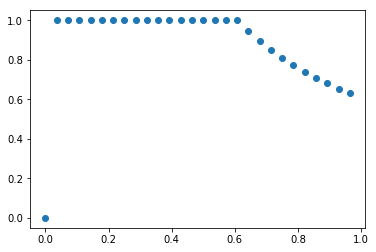

In [689]:
# This is wrong!
def pr_curve(retrieved_list):
    c=[]
    d=[]
    t=[1]*len(retrieved_list)
    for i in range(0,len(retrieved_list)):
        c.append(sk.metrics.precision_score(retrieved_list[:i],t[:i]))
        d.append(i/len(retrieved_list))
    return c,d
c,d=pr_curve(l_prl[3])
plt.plot(d,c,'o')
plt.show()

# TREC give a topic, a description and narrative to specify what is relevant document. 

# Significance testing

In [ ]:
metric_list=metric_rank1-metric_rank2 #using mean precision as the metric

In [762]:
#list for average precisions
def ap_list(retrieved_lists):
    apl=[]
    for i in retrieved_lists:
        apl.append(aeverage_precision(i))
    return apl
a=[1,0,1]
b=[1,1,0]
c=[0,0,1]
d=[a,b,c]
ap_list(d)

In [749]:
def t_test(apl1,apl2):
    a=apl1-apl2
    sd=np.std(a)
    mean=np.mean(a)
    n=len(a)
    t=mean/sd*np.sqrt(n)
    p=sp.stats.t.sf(t,n-1)
    return p

#The result would be different from the one given in the note since sd in the note is probably wrong.
#reject the null hypothesis that rank A is same to rank B if p value is greater than 0.05 or 0.25

In [764]:
def wilcox_test(apl1,apl2):
    a=apl1-apl2
    sp.stats.wilcoxon(a)